<a href="https://colab.research.google.com/github/TorbjornLarsson/SCDA/blob/main/Miniproject_1_SDE_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproject 1 SDE, task 1

In this project, we will model and simulate the dispersion of pollutants in a fluid medium (such as air or water) using both deterministic and stochastic formulations. Here we explore how diffusion and advection interact to transport pollutants uhe microscopic (Lagrangian) viewpoint, described by stochastic differential equations (SDEs) for individual particle motion.

***Stochastic model***

An equivalent microscopic description of the pollution process is obtained by considering the
stochastic motion of individual pollutant particles.

Each particle trajectory X(t) satisfies
the Itô stochastic differential equation (SDE)
dX(t) = u(X(t), t) dt + √(2D dB(t)), equation (0.2).
Here B(t) is a multi-dimensional Wiener process (standard Brownian motion).

The first term represents deterministic advection by the velocity field, and the second term represents
random diffusion with intensity proportional to D.

In [8]:
# Implement the Euler–Maruyama method
# to numerically integrate the SDE X(t) = u(X(t), t) dt + √(2D dB(t))
# over the time interval t ∈ [0, T] for N independent particles.
# Starting with an initial position X0, the update rule
# for each particle position is given by
# Xn+1 = Xn + u*h + √(2D*h*Zn), Zn ∼ N (0, I2),
# where I2 is the 2 × 2 identity matrix,
# h = tn+1 − tn is the chosen time step,
# Xn represents the numerical approximation of the particle position X(tn).

In [9]:
# Consider the two-dimensional computational domain
# Ω = [0, 25] × [−5, 5] (rectangle),
# and initialize all N = 2000 particles at the origin X0 = (0, 0).
# Use the constant parameters D = 0.02 (diffusion coefficient)
# and u = [0.3, 0] (advective velocity in xdirection),
# with a final simulation time T = 60 seconds and time step h = 0.1 seconds.
# Plot the particle positions (the “particle cloud”)
# at four distinct time levels: t = 15, 30, 45, and 60 seconds.
# Each time level should be presented in a separate subplot
# within a single figure for visual comparison.
# Use the matplotlib.pyplot (plt) scatter function to visualize the simulated
# particle clouds in two dimensions.
# Use the same x and y axes limits for all four plots.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama(X0, T, N_particles, h, u, D):
    """
    Implements the Euler–Maruyama method to numerically integrate an SDE.

    Args:
        X0 (np.ndarray): Initial position (2D array).
        T (float): Total simulation time.
        N_particles (int): Number of independent particles.
        h (float): Time step.
        u (np.ndarray): Drift coefficient vector (2D array, assumed constant).
        D (float): Diffusion coefficient (scalar).

    Returns:
        tuple: A tuple containing:
            - time_points (np.ndarray): Array of time points.
            - paths (np.ndarray): Trajectories for all particles
                                  (shape: num_steps + 1, N_particles, dimensions).
    """
    num_steps = int(T / h)
    time_points = np.linspace(0, T, num_steps + 1)

    dimensions = len(X0)
    paths = np.zeros((num_steps + 1, N_particles, dimensions))
    paths[0, :, :] = X0  # Set initial positions for all particles

    sqrt_2Dh = np.sqrt(2 * D * h)

    for i in range(num_steps):
        # Generate random numbers for each particle and each dimension (Zn ∼ N (0, I2))
        dW = np.random.normal(0, 1, (N_particles, dimensions))

        # Euler-Maruyama update rule: Xn+1 = Xn + u*h + √(2D*h)*dW
        paths[i+1, :, :] = paths[i, :, :] + u * h + sqrt_2Dh * dW

    return time_points, paths

# Computational domain Ω = [0, 25] × [−5, 5] (rectangle)
# Initialize N = 2000 particles at the origin X0 = (0, 0).
X0 = np.array([0.0, 0.0]) # Initial position (2D)
N_particles = 2000     # Number of independent particles

# Constant parameters
D = 0.02               # Diffusion coefficient (scalar)
u = np.array([0.3, 0.0]) # Advective velocity in x-direction (2D)

# Simulation parameters
T = 60.0               # Total simulation time
h = 0.1                # Time step

# Run the Euler-Maruyama function with the specified parameters
time_points, paths = euler_maruyama(X0, T, N_particles, h, u, D)

print(f"Initial position: {X0}")
print(f"Number of particles: {N_particles}")
print(f"Diffusion coefficient D: {D}")
print(f"Advective velocity u: {u}")
print(f"Total simulation time T: {T}")
print(f"Time step h: {h}")
print(f"Number of time points: {len(time_points)}")
print(f"Shape of particle paths (time, particles, dimensions): {paths.shape}")

Initial position: [0. 0.]
Number of particles: 2000
Diffusion coefficient D: 0.02
Advective velocity u: [0.3 0. ]
Total simulation time T: 60.0
Time step h: 0.1
Number of time points: 601
Shape of particle paths (time, particles, dimensions): (601, 2000, 2)


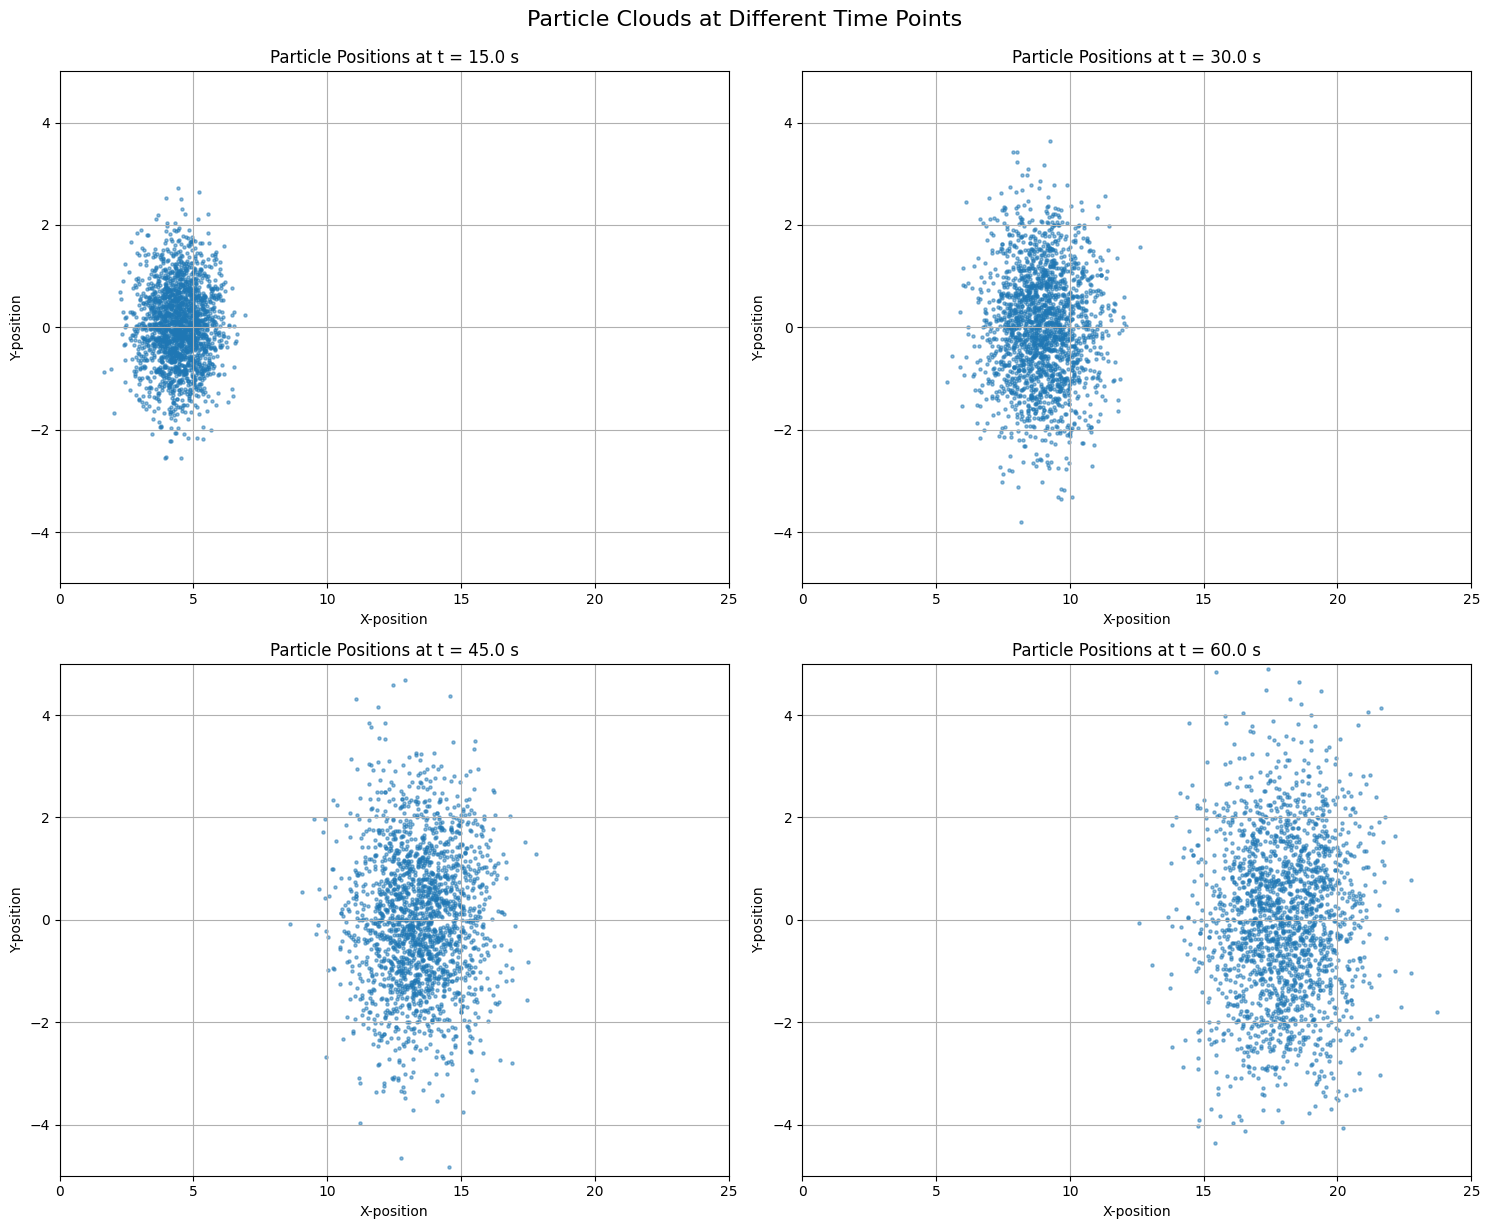

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time levels for plotting
time_levels = [15.0, 30.0, 45.0, 60.0]

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

# Define common axis limits
x_lim = [0, 25]
y_lim = [-5, 5]

for i, t_level in enumerate(time_levels):
    # Find the index for the current time level
    # Use np.argmin to find the closest time point if exact match is not found
    t_index = np.argmin(np.abs(time_points - t_level))

    # Extract particle positions at this time level
    positions_at_t = paths[t_index, :, :]

    # Plot on the current subplot
    axes[i].scatter(positions_at_t[:, 0], positions_at_t[:, 1], alpha=0.5, s=5)
    axes[i].set_title(f'Particle Positions at t = {time_points[t_index]:.1f} s')
    axes[i].set_xlabel('X-position')
    axes[i].set_ylabel('Y-position')
    axes[i].grid(True)

    # Set common axis limits for all subplots
    axes[i].set_xlim(x_lim)
    axes[i].set_ylim(y_lim)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Particle Clouds at Different Time Points', y=1.02, fontsize=16) # Overall title
plt.show()